In [2]:
import torch
from torch import nn
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

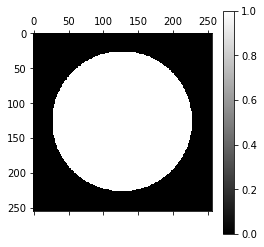

In [4]:
# generate some data
xx, yy = np.meshgrid(range(256), range(256))
image = (np.sqrt((xx-127)**2 + (yy - 127)**2) < 100).astype(np.float32)
image_tensor = torch.tensor(image, dtype = torch.float32)
plt.matshow(image, cmap = plt.cm.gray); plt.colorbar()

In [6]:
image_tensor.shape

torch.Size([256, 256])

In [16]:
class MyFirstCNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Conv2d(in_channels = 1, out_channels = 8, kernel_size = (5,5))
        )
        
    def forward(self, x):
        return self.layers(x)

In [17]:
model = MyFirstCNN()

In [18]:
# show the model
print(model)

MyFirstCNN(
  (layers): Sequential(
    (0): Conv2d(1, 8, kernel_size=(5, 5), stride=(1, 1))
  )
)


In [19]:
out = model(image_tensor)

RuntimeError: Expected 4-dimensional input for 4-dimensional weight [8, 1, 5, 5], but got 2-dimensional input of size [256, 256] instead

In [20]:
out = model(image_tensor.reshape(1, 1, 256, 256))

In [21]:
print(out.shape)

torch.Size([1, 8, 252, 252])


In [30]:
class MyFirstCNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Conv2d(in_channels = 1, out_channels = 8, kernel_size = (5,5), stride = 1)
        )
        
    def forward(self, x):
        return self.layers(x)

model = MyFirstCNN()

In [31]:
out = model(image_tensor.reshape(1, 1, 256, 256))
print(out.shape)

torch.Size([1, 8, 252, 252])


In [32]:
out_np = out.detach().squeeze()
print(out_np.shape)

torch.Size([8, 252, 252])


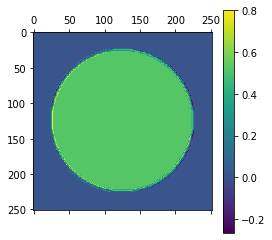

In [37]:
plt.matshow(out_np[0]); plt.colorbar()

In [42]:
class MySecondCNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Conv2d(in_channels = 1, out_channels = 8, kernel_size = (5,5), stride = 1),
            nn.MaxPool2d(kernel_size = (2,2), stride = 2),
            nn.ReLU()
        )
        
    def forward(self, x):
        return self.layers(x)

model = MySecondCNN()

In [45]:
print(model)

MySecondCNN(
  (layers): Sequential(
    (0): Conv2d(1, 8, kernel_size=(5, 5), stride=(1, 1))
    (1): MaxPool2d(kernel_size=(2, 2), stride=2, padding=0, dilation=1, ceil_mode=False)
    (2): ReLU()
  )
)


In [43]:
out = model(image_tensor.reshape(1, 1, 256, 256))
print(out.shape)

torch.Size([1, 8, 126, 126])


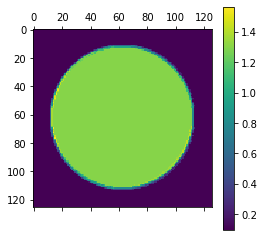

In [46]:
plt.matshow(out.detach()[0,0]); plt.colorbar()

In [47]:
class MyThirdCNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Conv2d(in_channels = 1, out_channels = 8, kernel_size = (5,5), stride = 1),
            nn.MaxPool2d(kernel_size = (2,2), stride = 2),
            nn.ReLU(),
            nn.Conv2d(in_channels = 8, out_channels = 16, kernel_size = (5,5))
        )
        
    def forward(self, x):
        return self.layers(x)

model = MyThirdCNN()
print(model)

MyThirdCNN(
  (layers): Sequential(
    (0): Conv2d(1, 8, kernel_size=(5, 5), stride=(1, 1))
    (1): MaxPool2d(kernel_size=(2, 2), stride=2, padding=0, dilation=1, ceil_mode=False)
    (2): ReLU()
    (3): Conv2d(8, 16, kernel_size=(5, 5), stride=(1, 1))
  )
)


In [48]:
out = model(image_tensor.reshape(1, 1, 256, 256))
print(out.shape)

torch.Size([1, 16, 122, 122])


In [49]:
model.layers[3]

Conv2d(8, 16, kernel_size=(5, 5), stride=(1, 1))

In [51]:
model.layers[0].weight.shape

torch.Size([8, 1, 5, 5])

In [50]:
model.layers[3].weight.shape

torch.Size([16, 8, 5, 5])

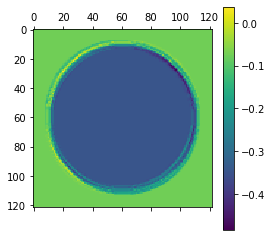

In [53]:
plt.matshow(out.detach()[0,0]); plt.colorbar()

In [64]:
class MyFourthCNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Conv2d(in_channels = 1, out_channels = 8, kernel_size = (5,5), stride = 1),
            nn.MaxPool2d(kernel_size = (2,2), stride = 2),
            nn.ReLU(),
            nn.Conv2d(in_channels = 8, out_channels = 16, kernel_size = (5,5)),
            nn.MaxPool2d(kernel_size = (2,2), stride = 2),
            nn.ReLU(),
            nn.Flatten(),
            nn.Linear(59536, 10)  # use the Flattened features determined
        )
        
    def forward(self, x):
        return self.layers(x)

model = MyFourthCNN()
print(model)

MyFourthCNN(
  (layers): Sequential(
    (0): Conv2d(1, 8, kernel_size=(5, 5), stride=(1, 1))
    (1): MaxPool2d(kernel_size=(2, 2), stride=2, padding=0, dilation=1, ceil_mode=False)
    (2): ReLU()
    (3): Conv2d(8, 16, kernel_size=(5, 5), stride=(1, 1))
    (4): MaxPool2d(kernel_size=(2, 2), stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): ReLU()
    (6): Flatten(start_dim=1, end_dim=-1)
    (7): Linear(in_features=59536, out_features=10, bias=True)
  )
)


In [70]:
out = model.layers[:6](image_tensor.reshape(1, 1, 256, 256))
print(out.shape)
out = model.layers[:7](image_tensor.reshape(1, 1, 256, 256))
print(out.shape)

torch.Size([1, 16, 61, 61])
torch.Size([1, 59536])


In [66]:
# total number of flattened features
out = model(image_tensor.reshape(1, 1, 256, 256))
print(out.shape)

torch.Size([1, 10])


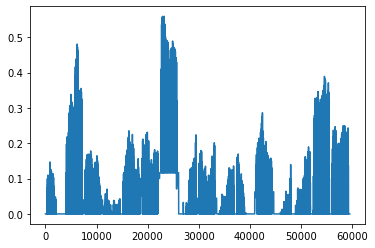

In [69]:
# this plot changes depending on which 'out' cell I run in the above 2 cells 
plt.plot(out.detach()[0])